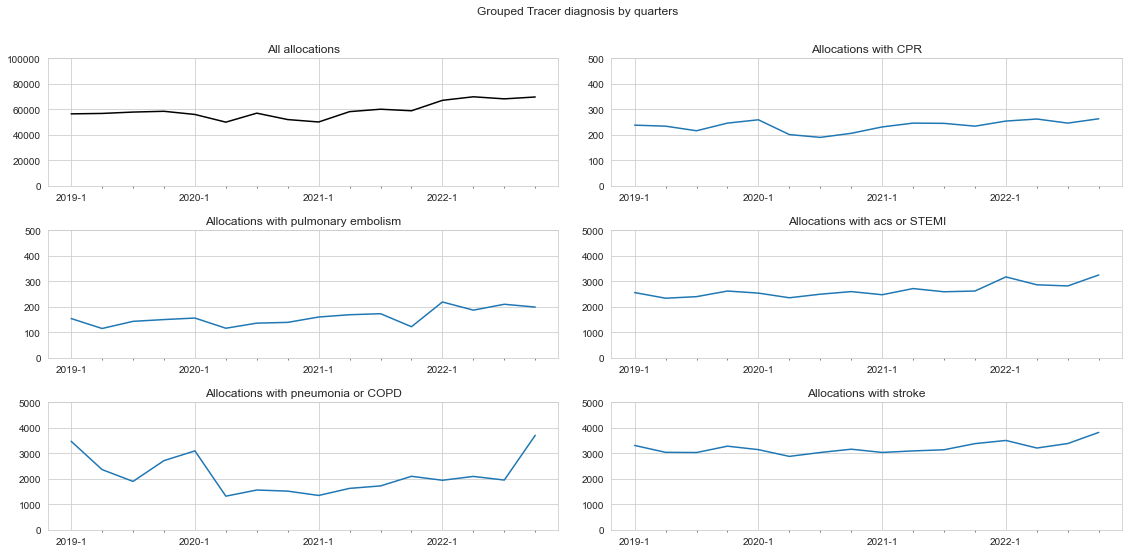

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dgina23_tracer_by_quarter.csv')
df_transposed = df.set_index('quarter').transpose()

fig, axes = plt.subplots(3, 2, figsize = (16,8))

fig.suptitle('Grouped Tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed['total'].plot(ax=axes[0,0], color="black", title="All allocations", ylim=[0,100000])
df_transposed['cpr'].plot(ax=axes[0,1], title="Allocations with CPR", ylim=[0,500])
df_transposed['pulmonary_embolism'].plot(ax=axes[1,0], title="Allocations with pulmonary embolism", ylim=[0,500])
df_transposed['acs_stemi'].plot(ax=axes[1,1], title="Allocations with acs or STEMI", ylim=[0,5000])
df_transposed['pneumonia_copd'].plot(ax=axes[2,0], title="Allocations with pneumonia or COPD", ylim=[0,5000])
df_transposed['stroke'].plot(ax=axes[2,1], title="Allocations with stroke", ylim=[0,5000])

plt.show();

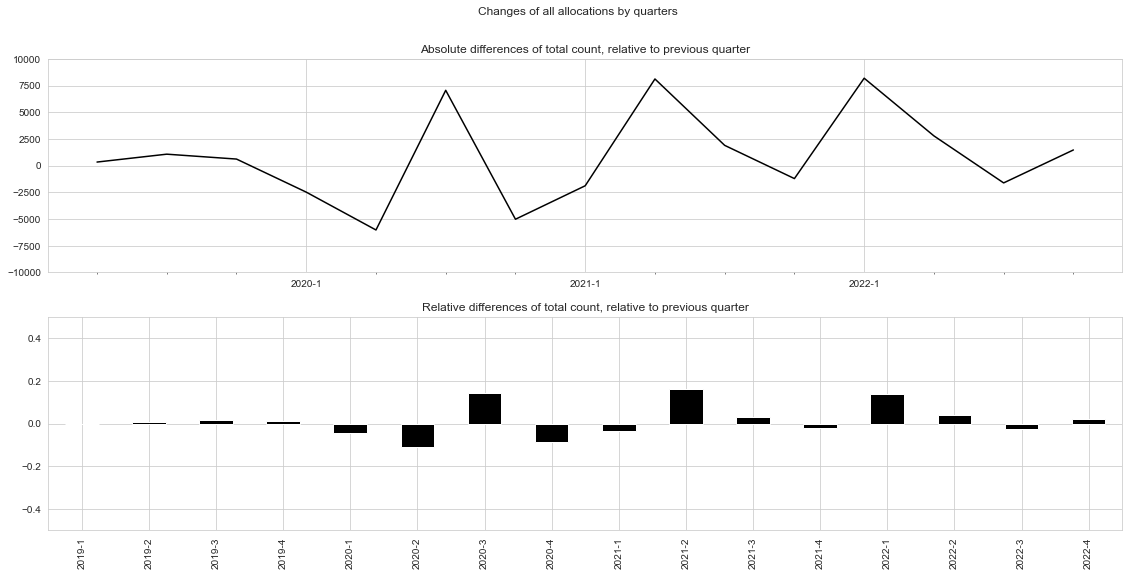

In [76]:
df_transposed['total_diff'] = df_transposed['total'].diff()
df_transposed['total_pct_change'] = df_transposed['total'].pct_change()

fig, axes = plt.subplots(2, 1, figsize = (16,8))

fig.suptitle('Changes of all allocations by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed['total_diff'].plot(kind="line", ax=axes[0], ylim=[-10000,10000], legend="", color="black")
axes[0].set_title('Absolute differences of total count, relative to previous quarter')
df_transposed['total_pct_change'].plot(kind="bar", ax=axes[1], ylim=[-0.5,0.5], legend="", color="black")
axes[1].set_title('Relative differences of total count, relative to previous quarter')

plt.show();

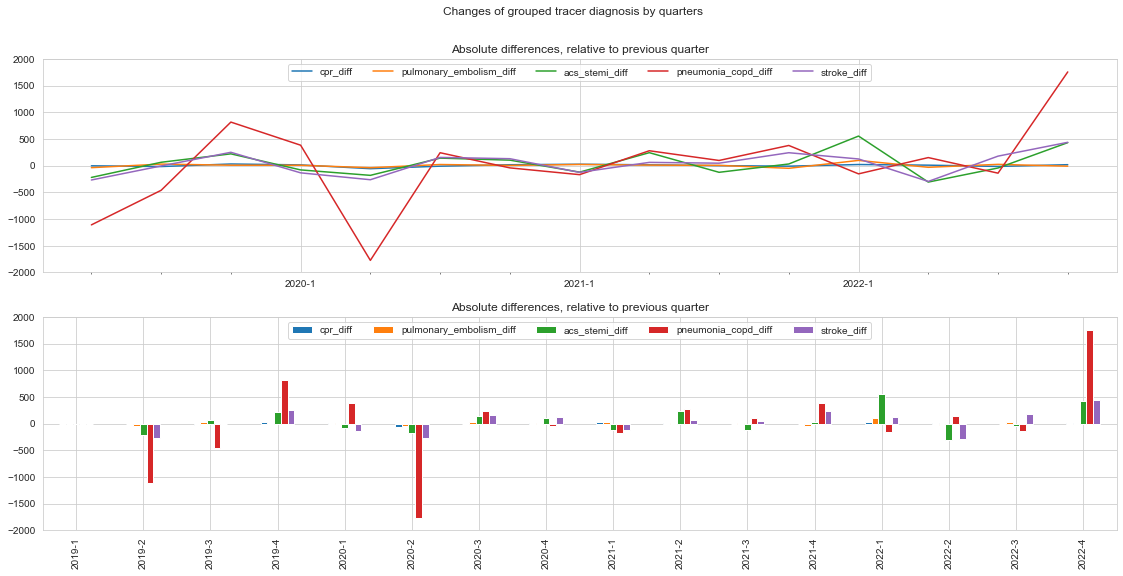

In [77]:
df_transposed['cpr_diff'] = df_transposed['cpr'].diff()
df_transposed['pulmonary_embolism_diff'] = df_transposed['pulmonary_embolism'].diff()
df_transposed['acs_stemi_diff'] = df_transposed['acs_stemi'].diff()
df_transposed['pneumonia_copd_diff'] = df_transposed['pneumonia_copd'].diff()
df_transposed['stroke_diff'] = df_transposed['stroke'].diff()

fig, axes = plt.subplots(2, 1, figsize = (16,8))

fig.suptitle('Changes of grouped tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed[['cpr_diff', 'pulmonary_embolism_diff', 'acs_stemi_diff', 'pneumonia_copd_diff', 'stroke_diff']].plot(ax=axes[0], ylim=[-2000,2000], legend="")
axes[0].set_title('Absolute differences, relative to previous quarter')
axes[0].legend(loc="upper center", ncol=5)
df_transposed[['cpr_diff', 'pulmonary_embolism_diff', 'acs_stemi_diff', 'pneumonia_copd_diff', 'stroke_diff']].plot(kind="bar", ax=axes[1], ylim=[-2000,2000], legend="")
axes[1].set_title('Absolute differences, relative to previous quarter')
axes[1].legend(loc="upper center", ncol=5)

plt.show();

In [94]:
def style_negative(v, props=''):
    return props if v < 0 else None

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

df1 = df_transposed[['acs_stemi_diff', 'acs_stemi_diff_q', 'cpr_diff', 'cpr_diff_q', 'pulmonary_embolism_diff', 'pulmonary_embolism_diff_q', 'pneumonia_copd_diff', 'pneumonia_copd_diff_q', 'stroke_diff', 'stroke_diff_q']].transpose().sort_index()
t1 = df1.style \
    .highlight_null(null_color="lightgrey") \
    .format(precision=0, thousands="", decimal=",") \
    .applymap(style_negative, props='color:red;') \
    .applymap(lambda v: 'opacity: 20%;' if (v < 50) and (v > -50) else None)

t1.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

/var/folders/1y/jdsdrc9d3q399f05fm5dpdl80000gn/T/ipykernel_1478/625544875.py:5: RuntimeWarning: All-NaN slice encountered
  return np.where(s == np.nanmax(s.values), props, '')


,2019-1,2019-2,2019-3,2019-4,2020-1,2020-2,2020-3,2020-4,2021-1,2021-2,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4
quarter,,,,,,,,,,,,,,,,
acs_stemi_diff,nan,-222,62,220,-81,-183,140,102,-123,242,-126,30,553,-309,-45,430
acs_stemi_diff_q,nan,nan,nan,nan,-21,18,96,-22,-64,361,95,23,699,148,229,629
cpr_diff,nan,-4,-18,30,13,-58,-11,16,25,15,-1,-11,20,8,-16,17
cpr_diff_q,nan,nan,nan,nan,21,-33,-26,-40,-28,45,55,28,23,16,1,29
pneumonia_copd_diff,nan,-1111,-463,815,382,-1776,241,-43,-170,278,96,377,-155,150,-142,1755
pneumonia_copd_diff_q,nan,nan,nan,nan,-377,-1042,-338,-1196,-1748,306,161,581,596,468,230,1608
pulmonary_embolism_diff,nan,-39,28,7,6,-40,20,3,21,9,4,-51,97,-32,23,-11
pulmonary_embolism_diff_q,nan,nan,nan,nan,2,1,-7,-11,4,53,37,-17,59,18,37,77
stroke_diff,nan,-270,-7,249,-136,-265,153,129,-127,60,45,241,124,-297,177,436


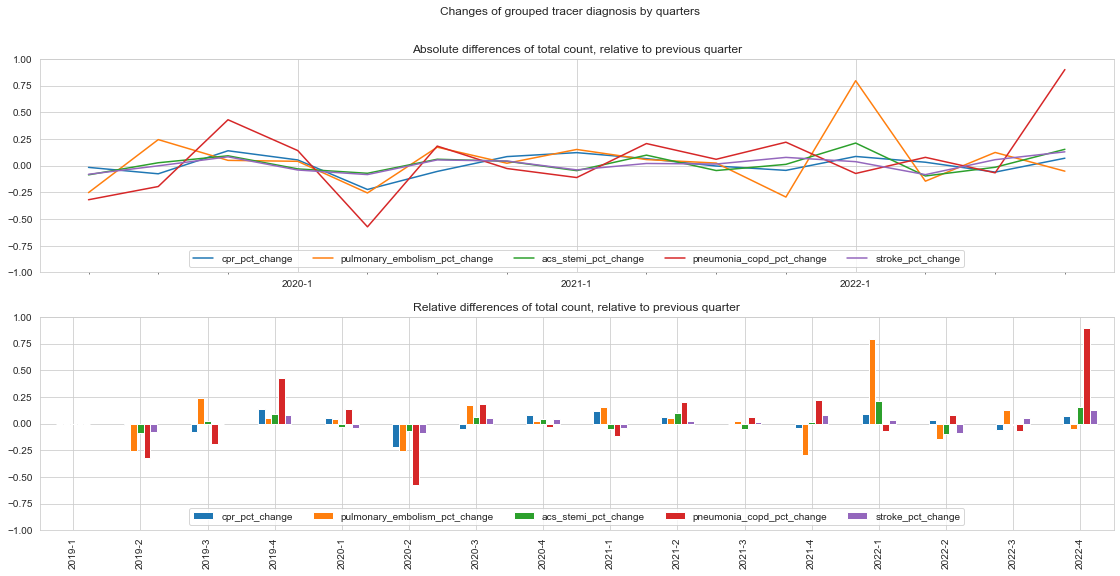

In [78]:
df_transposed['cpr_pct_change'] = df_transposed['cpr'].pct_change()
df_transposed['pulmonary_embolism_pct_change'] = df_transposed['pulmonary_embolism'].pct_change()
df_transposed['acs_stemi_pct_change'] = df_transposed['acs_stemi'].pct_change()
df_transposed['pneumonia_copd_pct_change'] = df_transposed['pneumonia_copd'].pct_change()
df_transposed['stroke_pct_change'] = df_transposed['stroke'].pct_change()

fig, axes = plt.subplots(2, 1, figsize = (16,8))

fig.suptitle('Changes of grouped tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed[['cpr_pct_change', 'pulmonary_embolism_pct_change', 'acs_stemi_pct_change', 'pneumonia_copd_pct_change', 'stroke_pct_change']].plot(ax=axes[0], ylim=[-1,1], legend="")
axes[0].legend(loc="lower center", ncol=5)
axes[0].set_title('Absolute differences of total count, relative to previous quarter')
df_transposed[['cpr_pct_change', 'pulmonary_embolism_pct_change', 'acs_stemi_pct_change', 'pneumonia_copd_pct_change', 'stroke_pct_change']].plot(kind="bar", ax=axes[1], ylim=[-1,1], legend="")
axes[1].legend(loc="lower center", ncol=5)
axes[1].set_title('Relative differences of total count, relative to previous quarter')

plt.show();

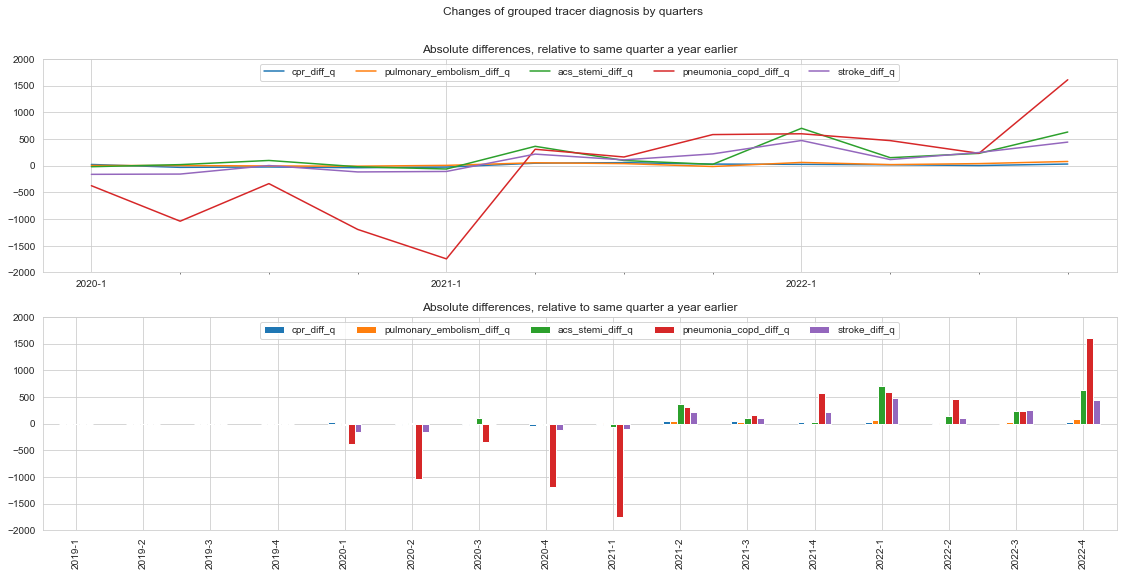

In [79]:
df_transposed['cpr_diff_q'] = df_transposed['cpr'].diff(periods=4)
df_transposed['pulmonary_embolism_diff_q'] = df_transposed['pulmonary_embolism'].diff(periods=4)
df_transposed['acs_stemi_diff_q'] = df_transposed['acs_stemi'].diff(periods=4)
df_transposed['pneumonia_copd_diff_q'] = df_transposed['pneumonia_copd'].diff(periods=4)
df_transposed['stroke_diff_q'] = df_transposed['stroke'].diff(periods=4)

fig, axes = plt.subplots(2, 1, figsize = (16,8))

fig.suptitle('Changes of grouped tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(4))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed[['cpr_diff_q', 'pulmonary_embolism_diff_q', 'acs_stemi_diff_q', 'pneumonia_copd_diff_q', 'stroke_diff_q']].plot(ax=axes[0], ylim=[-2000,2000], legend="")
axes[0].set_title('Absolute differences, relative to same quarter a year earlier')
axes[0].legend(loc="upper center", ncol=5)
df_transposed[['cpr_diff_q', 'pulmonary_embolism_diff_q', 'acs_stemi_diff_q', 'pneumonia_copd_diff_q', 'stroke_diff_q']].plot(kind="bar", ax=axes[1], ylim=[-2000,2000], legend="")
axes[1].set_title('Absolute differences, relative to same quarter a year earlier')
axes[1].legend(loc="upper center", ncol=5)

plt.show();

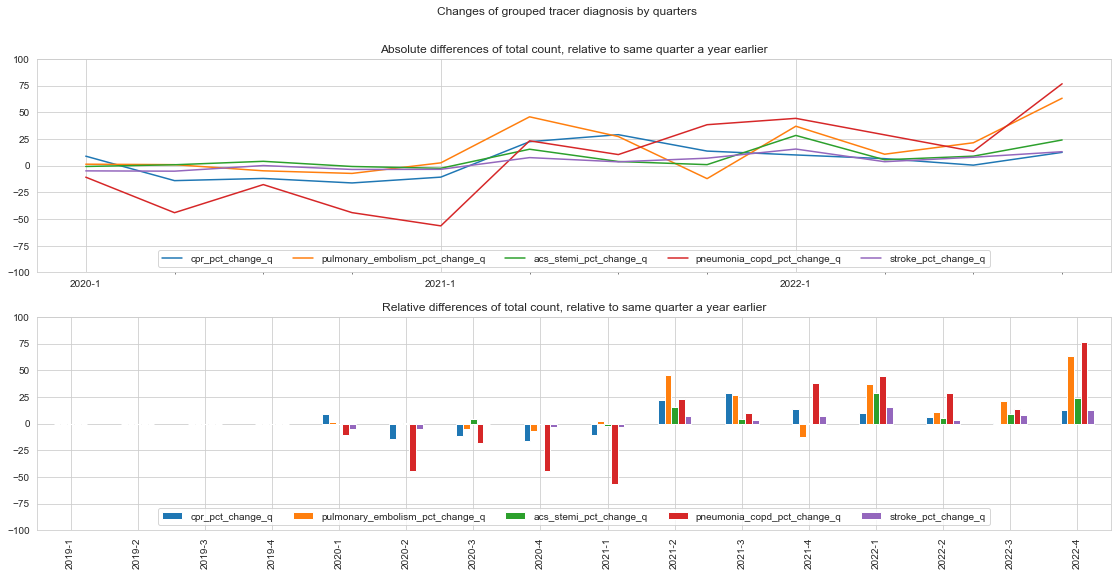

In [80]:
df_transposed['cpr_pct_change_q'] = df_transposed['cpr'].pct_change(periods=4) * 100
df_transposed['pulmonary_embolism_pct_change_q'] = df_transposed['pulmonary_embolism'].pct_change(periods=4) * 100
df_transposed['acs_stemi_pct_change_q'] = df_transposed['acs_stemi'].pct_change(periods=4) * 100
df_transposed['pneumonia_copd_pct_change_q'] = df_transposed['pneumonia_copd'].pct_change(periods=4) * 100
df_transposed['stroke_pct_change_q'] = df_transposed['stroke'].pct_change(periods=4) * 100

fig, axes = plt.subplots(2, 1, figsize = (16,8))

fig.suptitle('Changes of grouped tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(4))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed[['cpr_pct_change_q', 'pulmonary_embolism_pct_change_q', 'acs_stemi_pct_change_q', 'pneumonia_copd_pct_change_q', 'stroke_pct_change_q']].plot(ax=axes[0], ylim=[-100,100], legend="")
axes[0].legend(loc="lower center", ncol=5)
axes[0].set_title('Absolute differences of total count, relative to same quarter a year earlier')
df_transposed[['cpr_pct_change_q', 'pulmonary_embolism_pct_change_q', 'acs_stemi_pct_change_q', 'pneumonia_copd_pct_change_q', 'stroke_pct_change_q']].plot(kind="bar", ax=axes[1], ylim=[-100,100], legend="")
axes[1].legend(loc="lower center", ncol=5)
axes[1].set_title('Relative differences of total count, relative to same quarter a year earlier')

plt.show();

In [95]:
df2 = df_transposed[['acs_stemi_pct_change', 'acs_stemi_pct_change_q', 'cpr_pct_change', 'cpr_pct_change_q', 'pulmonary_embolism_pct_change', 'pulmonary_embolism_pct_change_q', 'pneumonia_copd_pct_change', 'pneumonia_copd_pct_change_q', 'stroke_pct_change', 'stroke_pct_change_q']].transpose().sort_index()
t2 = df2.style \
    .highlight_null(null_color="lightgrey") \
    .format(precision=2, thousands="", decimal=",") \
    .applymap(style_negative, props='color:red;') \
    .applymap(lambda v: 'opacity: 20%;' if (v < 10) and (v > -10) else None)
t2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

/var/folders/1y/jdsdrc9d3q399f05fm5dpdl80000gn/T/ipykernel_1478/625544875.py:5: RuntimeWarning: All-NaN slice encountered
  return np.where(s == np.nanmax(s.values), props, '')


,2019-1,2019-2,2019-3,2019-4,2020-1,2020-2,2020-3,2020-4,2021-1,2021-2,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4
quarter,,,,,,,,,,,,,,,,
acs_stemi_pct_change,nan,"-0,09","0,03","0,09","-0,03","-0,07","0,06","0,04","-0,05","0,10","-0,05","0,01","0,21","-0,10","-0,02","0,15"
acs_stemi_pct_change_q,nan,nan,nan,nan,"-0,82","0,77","4,00","-0,84","-2,52","15,33","3,81","0,89","28,25","5,45","8,84","24,01"
cpr_pct_change,nan,"-0,02","-0,08","0,14","0,05","-0,22","-0,05","0,08","0,12","0,06","-0,00","-0,04","0,09","0,03","-0,06","0,07"
cpr_pct_change_q,nan,nan,nan,nan,"8,82","-14,10","-12,04","-16,26","-10,81","22,39","28,95","13,59","9,96","6,50","0,41","12,39"
pneumonia_copd_pct_change,nan,"-0,32","-0,20","0,43","0,14","-0,57","0,18","-0,03","-0,11","0,21","0,06","0,22","-0,07","0,08","-0,07","0,90"
pneumonia_copd_pct_change_q,nan,nan,nan,nan,"-10,86","-44,13","-17,81","-44,08","-56,48","23,20","10,32","38,30","44,25","28,80","13,36","76,64"
pulmonary_embolism_pct_change,nan,"-0,25","0,24","0,05","0,04","-0,26","0,17","0,02","0,15","0,06","0,02","-0,29","0,80","-0,15","0,12","-0,05"
pulmonary_embolism_pct_change_q,nan,nan,nan,nan,"1,30","0,87","-4,90","-7,33","2,56","45,69","27,21","-12,23","36,87","10,65","21,39","63,11"
stroke_pct_change,nan,"-0,08","-0,00","0,08","-0,04","-0,08","0,05","0,04","-0,04","0,02","0,01","0,08","0,04","-0,08","0,06","0,13"
